# Lecture 60: Activity recognition using CNN-LSTM
## 60c: Train LSTM using features extracted from CNN

#### Dataset: [UCF101](http://crcv.ucf.edu/data/UCF101.php)

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

import os
import numpy as np
from random import shuffle
import copy
import time

In [2]:
# Check availability of GPU
use_gpu = torch.cuda.is_available()

In [3]:
# Directories containing extracted features
trainPath = 'ucf101_resnet18Feat/train/'
testPath = 'ucf101_resnet18Feat/test/'

In [4]:
# Creating train list for loading feature tensors
classes = os.listdir(trainPath)
classes.sort()
labels = np.arange(5)
trainShuffList = []
labelShuffList = []
for c in range(5):
    files = os.listdir(trainPath+classes[c])
    for f in files:
        trainShuffList.append(classes[c]+'/'+f)  
        labelShuffList.append(float(labels[c]))
# Shuffling data list and label list
trainList = list(zip(trainShuffList, labelShuffList))
shuffle(trainList)
trainShuffList, labelShuffList = zip(*trainList)

In [5]:
# Creating test list for loading feature tensors
testList = []
testLabelList = []
for c in range(5):
    files = os.listdir(testPath+classes[c])
    for f in files:
        testList.append(classes[c]+'/'+f)  
        testLabelList.append(float(labels[c]))

### Define network architecture

In [6]:
class net_LSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz, nLayers, nClasses):
        super(net_LSTM, self).__init__()       
        self.lstm = nn.LSTM(input_sz, hidden_sz, nLayers, batch_first=True)
        self.fc = nn.Linear(hidden_sz, nClasses)        
    
    def forward(self, x):      
        out, _ = self.lstm(x)       
        # Output from hidden state of last time step
        out = self.fc(out[:, -1, :])  
        return out

### Define train routine

In [7]:
def train(net, inputs, labels, optimizer, criterion):
    net.train(True)
    if use_gpu:
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
    else:
        inputs, labels = Variable(inputs), Variable(labels)
    # Feed-forward
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)     
    # Initialize gradients to zero
    optimizer.zero_grad() 
    # Compute loss/error
    loss = criterion(F.log_softmax(outputs), labels)
    # Backpropagate loss and compute gradients
    loss.backward()
    # Update the network parameters
    optimizer.step()
    if use_gpu:
        correct = (predicted.cpu() == labels.data.cpu()).sum()
    else:
        correct = (predicted == labels.data).sum()
    return net, loss.data.item(), correct    

### Define test routine

In [8]:
def test(net, inputs, labels, criterion):
    net.train(False)
    if use_gpu:
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
    else:
        inputs, labels = Variable(inputs), Variable(labels)
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)  
    # Compute loss/error
    loss = criterion(F.log_softmax(outputs), labels)   
    if use_gpu:
        correct = (predicted.cpu() == labels.data.cpu()).sum()
    else:
        correct = (predicted == labels.data).sum()
    return loss.data.item(), correct    

### Initialize network

In [9]:
net = net_LSTM(512, 8, 2, 5) # Input feature length->512, hidden layer size->8, number of layers->2
if use_gpu:
    net = net.cuda()

### Define loss function and optimizer

In [10]:
criterion = nn.NLLLoss() # Negative Log-likelihood
optimizer = optim.Adam(net.parameters(), lr=1e-4) # Adam

### Train network

/home/amrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]
/home/amrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Iteration: 1 /1000;  Training Loss: 0.051008 ; Training Acc: 17.417
Iteration: 1 /1000;  Testing Loss: 0.062561 ; Testing Acc: 23.308
Time consumed: 0m 22s
Iteration: 2 /1000;  Training Loss: 0.050976 ; Training Acc: 17.417
Iteration: 2 /1000;  Testing Loss: 0.062523 ; Testing Acc: 24.060
Time consumed: 0m 1s
Iteration: 3 /1000;  Training Loss: 0.050945 ; Training Acc: 17.417
Iteration: 3 /1000;  Testing Loss: 0.062494 ; Testing Acc: 24.060
Time consumed: 0m 1s
Iteration: 4 /1000;  Training Loss: 0.050916 ; Training Acc: 17.417
Iteration: 4 /1000;  Testing Loss: 0.062465 ; Testing Acc: 24.812
Time consumed: 0m 1s
Iteration: 5 /1000;  Training Loss: 0.050895 ; Training Acc: 17.417
Iteration: 5 /1000;  Testing Loss: 0.062450 ; Testing Acc: 22.556
Time consumed: 0m 1s
Iteration: 6 /1000;  Training Loss: 0.050868 ; Training Acc: 19.569
Iteration: 6 /1000;  Testing Loss: 0.062434 ; Testing Acc: 26.316
Time consumed: 0m 1s
Iteration: 7 /1000;  Training Loss: 0.050840 ; Training Acc: 22.505
I

Iteration: 54 /1000;  Training Loss: 0.050206 ; Training Acc: 22.505
Iteration: 54 /1000;  Testing Loss: 0.061368 ; Testing Acc: 26.316
Time consumed: 0m 1s
Iteration: 55 /1000;  Training Loss: 0.050202 ; Training Acc: 22.505
Iteration: 55 /1000;  Testing Loss: 0.061381 ; Testing Acc: 27.068
Time consumed: 0m 1s
Iteration: 56 /1000;  Training Loss: 0.050196 ; Training Acc: 22.505
Iteration: 56 /1000;  Testing Loss: 0.061379 ; Testing Acc: 28.571
Time consumed: 0m 1s
Iteration: 57 /1000;  Training Loss: 0.050193 ; Training Acc: 22.505
Iteration: 57 /1000;  Testing Loss: 0.061372 ; Testing Acc: 24.812
Time consumed: 0m 1s
Iteration: 58 /1000;  Training Loss: 0.050189 ; Training Acc: 22.505
Iteration: 58 /1000;  Testing Loss: 0.061374 ; Testing Acc: 25.564
Time consumed: 0m 1s
Iteration: 59 /1000;  Training Loss: 0.050185 ; Training Acc: 22.505
Iteration: 59 /1000;  Testing Loss: 0.061372 ; Testing Acc: 27.820
Time consumed: 0m 1s
Iteration: 60 /1000;  Training Loss: 0.050184 ; Training A

Iteration: 107 /1000;  Training Loss: 0.050134 ; Training Acc: 24.070
Iteration: 107 /1000;  Testing Loss: 0.061381 ; Testing Acc: 32.331
Time consumed: 0m 1s
Iteration: 108 /1000;  Training Loss: 0.050125 ; Training Acc: 26.419
Iteration: 108 /1000;  Testing Loss: 0.061388 ; Testing Acc: 29.323
Time consumed: 0m 1s
Iteration: 109 /1000;  Training Loss: 0.050122 ; Training Acc: 23.483
Iteration: 109 /1000;  Testing Loss: 0.061386 ; Testing Acc: 29.323
Time consumed: 0m 1s
Iteration: 110 /1000;  Training Loss: 0.050127 ; Training Acc: 27.006
Iteration: 110 /1000;  Testing Loss: 0.061406 ; Testing Acc: 31.579
Time consumed: 0m 1s
Iteration: 111 /1000;  Training Loss: 0.050131 ; Training Acc: 25.049
Iteration: 111 /1000;  Testing Loss: 0.061304 ; Testing Acc: 33.083
Time consumed: 0m 1s
Iteration: 112 /1000;  Training Loss: 0.050131 ; Training Acc: 23.092
Iteration: 112 /1000;  Testing Loss: 0.061453 ; Testing Acc: 25.564
Time consumed: 0m 1s
Iteration: 113 /1000;  Training Loss: 0.050135

Iteration: 159 /1000;  Training Loss: 0.050063 ; Training Acc: 26.419
Iteration: 159 /1000;  Testing Loss: 0.061395 ; Testing Acc: 32.331
Time consumed: 0m 1s
Iteration: 160 /1000;  Training Loss: 0.050066 ; Training Acc: 26.810
Iteration: 160 /1000;  Testing Loss: 0.061312 ; Testing Acc: 31.579
Time consumed: 0m 1s
Iteration: 161 /1000;  Training Loss: 0.050067 ; Training Acc: 26.810
Iteration: 161 /1000;  Testing Loss: 0.061305 ; Testing Acc: 36.090
Time consumed: 0m 1s
Iteration: 162 /1000;  Training Loss: 0.050061 ; Training Acc: 27.984
Iteration: 162 /1000;  Testing Loss: 0.061289 ; Testing Acc: 32.331
Time consumed: 0m 1s
Iteration: 163 /1000;  Training Loss: 0.050072 ; Training Acc: 22.896
Iteration: 163 /1000;  Testing Loss: 0.061321 ; Testing Acc: 27.068
Time consumed: 0m 1s
Iteration: 164 /1000;  Training Loss: 0.050075 ; Training Acc: 23.288
Iteration: 164 /1000;  Testing Loss: 0.061263 ; Testing Acc: 30.075
Time consumed: 0m 1s
Iteration: 165 /1000;  Training Loss: 0.050062

Iteration: 211 /1000;  Training Loss: 0.050000 ; Training Acc: 27.397
Iteration: 211 /1000;  Testing Loss: 0.061124 ; Testing Acc: 33.083
Time consumed: 0m 1s
Iteration: 212 /1000;  Training Loss: 0.049984 ; Training Acc: 26.223
Iteration: 212 /1000;  Testing Loss: 0.061073 ; Testing Acc: 30.827
Time consumed: 0m 1s
Iteration: 213 /1000;  Training Loss: 0.049978 ; Training Acc: 24.266
Iteration: 213 /1000;  Testing Loss: 0.061147 ; Testing Acc: 30.075
Time consumed: 0m 1s
Iteration: 214 /1000;  Training Loss: 0.049954 ; Training Acc: 29.746
Iteration: 214 /1000;  Testing Loss: 0.061173 ; Testing Acc: 34.586
Time consumed: 0m 1s
Iteration: 215 /1000;  Training Loss: 0.049995 ; Training Acc: 25.245
Iteration: 215 /1000;  Testing Loss: 0.061183 ; Testing Acc: 31.579
Time consumed: 0m 1s
Iteration: 216 /1000;  Training Loss: 0.050000 ; Training Acc: 31.115
Iteration: 216 /1000;  Testing Loss: 0.061088 ; Testing Acc: 39.098
Time consumed: 0m 1s
Iteration: 217 /1000;  Training Loss: 0.049980

Iteration: 263 /1000;  Training Loss: 0.049603 ; Training Acc: 24.853
Iteration: 263 /1000;  Testing Loss: 0.061023 ; Testing Acc: 34.586
Time consumed: 0m 1s
Iteration: 264 /1000;  Training Loss: 0.049647 ; Training Acc: 28.571
Iteration: 264 /1000;  Testing Loss: 0.061174 ; Testing Acc: 35.338
Time consumed: 0m 1s
Iteration: 265 /1000;  Training Loss: 0.049694 ; Training Acc: 25.440
Iteration: 265 /1000;  Testing Loss: 0.060883 ; Testing Acc: 35.338
Time consumed: 0m 1s
Iteration: 266 /1000;  Training Loss: 0.049551 ; Training Acc: 29.550
Iteration: 266 /1000;  Testing Loss: 0.061456 ; Testing Acc: 34.586
Time consumed: 0m 1s
Iteration: 267 /1000;  Training Loss: 0.049653 ; Training Acc: 26.419
Iteration: 267 /1000;  Testing Loss: 0.060654 ; Testing Acc: 30.075
Time consumed: 0m 1s
Iteration: 268 /1000;  Training Loss: 0.049755 ; Training Acc: 26.614
Iteration: 268 /1000;  Testing Loss: 0.061104 ; Testing Acc: 39.850
Time consumed: 0m 1s
Iteration: 269 /1000;  Training Loss: 0.049548

Iteration: 317 /1000;  Training Loss: 0.048616 ; Training Acc: 28.376
Iteration: 317 /1000;  Testing Loss: 0.061313 ; Testing Acc: 28.571
Time consumed: 0m 1s
Iteration: 318 /1000;  Training Loss: 0.048546 ; Training Acc: 29.159
Iteration: 318 /1000;  Testing Loss: 0.059267 ; Testing Acc: 44.361
Time consumed: 0m 1s
Iteration: 319 /1000;  Training Loss: 0.047984 ; Training Acc: 32.290
Iteration: 319 /1000;  Testing Loss: 0.059272 ; Testing Acc: 42.857
Time consumed: 0m 1s
Iteration: 320 /1000;  Training Loss: 0.048916 ; Training Acc: 27.006
Iteration: 320 /1000;  Testing Loss: 0.058429 ; Testing Acc: 33.083
Time consumed: 0m 1s
Iteration: 321 /1000;  Training Loss: 0.048242 ; Training Acc: 29.941
Iteration: 321 /1000;  Testing Loss: 0.058586 ; Testing Acc: 40.602
Time consumed: 0m 1s
Iteration: 322 /1000;  Training Loss: 0.048047 ; Training Acc: 30.724
Iteration: 322 /1000;  Testing Loss: 0.058791 ; Testing Acc: 43.609
Time consumed: 0m 1s
Iteration: 323 /1000;  Training Loss: 0.048295

Iteration: 369 /1000;  Training Loss: 0.043166 ; Training Acc: 37.965
Iteration: 369 /1000;  Testing Loss: 0.055681 ; Testing Acc: 39.098
Time consumed: 0m 1s
Iteration: 370 /1000;  Training Loss: 0.043117 ; Training Acc: 39.139
Iteration: 370 /1000;  Testing Loss: 0.052524 ; Testing Acc: 42.857
Time consumed: 0m 1s
Iteration: 371 /1000;  Training Loss: 0.043447 ; Training Acc: 36.008
Iteration: 371 /1000;  Testing Loss: 0.051225 ; Testing Acc: 44.361
Time consumed: 0m 1s
Iteration: 372 /1000;  Training Loss: 0.042995 ; Training Acc: 36.986
Iteration: 372 /1000;  Testing Loss: 0.051486 ; Testing Acc: 46.617
Time consumed: 0m 1s
Iteration: 373 /1000;  Training Loss: 0.042481 ; Training Acc: 36.204
Iteration: 373 /1000;  Testing Loss: 0.051241 ; Testing Acc: 44.361
Time consumed: 0m 1s
Iteration: 374 /1000;  Training Loss: 0.043756 ; Training Acc: 36.204
Iteration: 374 /1000;  Testing Loss: 0.049979 ; Testing Acc: 49.624
Time consumed: 0m 1s
Iteration: 375 /1000;  Training Loss: 0.043146

Iteration: 421 /1000;  Training Loss: 0.040011 ; Training Acc: 36.791
Iteration: 421 /1000;  Testing Loss: 0.048481 ; Testing Acc: 42.857
Time consumed: 0m 1s
Iteration: 422 /1000;  Training Loss: 0.042370 ; Training Acc: 36.204
Iteration: 422 /1000;  Testing Loss: 0.052220 ; Testing Acc: 40.602
Time consumed: 0m 1s
Iteration: 423 /1000;  Training Loss: 0.042262 ; Training Acc: 35.616
Iteration: 423 /1000;  Testing Loss: 0.049346 ; Testing Acc: 39.098
Time consumed: 0m 1s
Iteration: 424 /1000;  Training Loss: 0.039699 ; Training Acc: 36.204
Iteration: 424 /1000;  Testing Loss: 0.049095 ; Testing Acc: 42.857
Time consumed: 0m 1s
Iteration: 425 /1000;  Training Loss: 0.040444 ; Training Acc: 37.769
Iteration: 425 /1000;  Testing Loss: 0.048510 ; Testing Acc: 39.850
Time consumed: 0m 1s
Iteration: 426 /1000;  Training Loss: 0.039789 ; Training Acc: 38.748
Iteration: 426 /1000;  Testing Loss: 0.047309 ; Testing Acc: 47.368
Time consumed: 0m 1s
Iteration: 427 /1000;  Training Loss: 0.039886

Iteration: 473 /1000;  Training Loss: 0.038129 ; Training Acc: 41.683
Iteration: 473 /1000;  Testing Loss: 0.046227 ; Testing Acc: 50.376
Time consumed: 0m 1s
Iteration: 474 /1000;  Training Loss: 0.038541 ; Training Acc: 40.313
Iteration: 474 /1000;  Testing Loss: 0.046267 ; Testing Acc: 45.865
Time consumed: 0m 1s
Iteration: 475 /1000;  Training Loss: 0.038074 ; Training Acc: 41.096
Iteration: 475 /1000;  Testing Loss: 0.046883 ; Testing Acc: 44.361
Time consumed: 0m 1s
Iteration: 476 /1000;  Training Loss: 0.038915 ; Training Acc: 41.487
Iteration: 476 /1000;  Testing Loss: 0.047365 ; Testing Acc: 42.857
Time consumed: 0m 1s
Iteration: 477 /1000;  Training Loss: 0.038037 ; Training Acc: 40.900
Iteration: 477 /1000;  Testing Loss: 0.049061 ; Testing Acc: 40.602
Time consumed: 0m 1s
Iteration: 478 /1000;  Training Loss: 0.038729 ; Training Acc: 39.139
Iteration: 478 /1000;  Testing Loss: 0.046765 ; Testing Acc: 43.609
Time consumed: 0m 1s
Iteration: 479 /1000;  Training Loss: 0.038663

Iteration: 525 /1000;  Training Loss: 0.037134 ; Training Acc: 40.900
Iteration: 525 /1000;  Testing Loss: 0.049860 ; Testing Acc: 39.850
Time consumed: 0m 1s
Iteration: 526 /1000;  Training Loss: 0.038494 ; Training Acc: 43.249
Iteration: 526 /1000;  Testing Loss: 0.045519 ; Testing Acc: 51.880
Time consumed: 0m 1s
Iteration: 527 /1000;  Training Loss: 0.036910 ; Training Acc: 46.380
Iteration: 527 /1000;  Testing Loss: 0.045687 ; Testing Acc: 45.865
Time consumed: 0m 1s
Iteration: 528 /1000;  Training Loss: 0.036645 ; Training Acc: 47.554
Iteration: 528 /1000;  Testing Loss: 0.047456 ; Testing Acc: 44.361
Time consumed: 0m 1s
Iteration: 529 /1000;  Training Loss: 0.037611 ; Training Acc: 45.205
Iteration: 529 /1000;  Testing Loss: 0.046970 ; Testing Acc: 44.361
Time consumed: 0m 1s
Iteration: 530 /1000;  Training Loss: 0.036879 ; Training Acc: 43.836
Iteration: 530 /1000;  Testing Loss: 0.046053 ; Testing Acc: 46.617
Time consumed: 0m 1s
Iteration: 531 /1000;  Training Loss: 0.037932

Iteration: 577 /1000;  Training Loss: 0.036166 ; Training Acc: 45.010
Iteration: 577 /1000;  Testing Loss: 0.044753 ; Testing Acc: 49.624
Time consumed: 0m 1s
Iteration: 578 /1000;  Training Loss: 0.036289 ; Training Acc: 45.793
Iteration: 578 /1000;  Testing Loss: 0.044964 ; Testing Acc: 51.128
Time consumed: 0m 1s
Iteration: 579 /1000;  Training Loss: 0.036427 ; Training Acc: 45.988
Iteration: 579 /1000;  Testing Loss: 0.045578 ; Testing Acc: 48.872
Time consumed: 0m 1s
Iteration: 580 /1000;  Training Loss: 0.038061 ; Training Acc: 40.117
Iteration: 580 /1000;  Testing Loss: 0.044775 ; Testing Acc: 48.872
Time consumed: 0m 1s
Iteration: 581 /1000;  Training Loss: 0.036197 ; Training Acc: 44.814
Iteration: 581 /1000;  Testing Loss: 0.045092 ; Testing Acc: 48.872
Time consumed: 0m 1s
Iteration: 582 /1000;  Training Loss: 0.035800 ; Training Acc: 46.380
Iteration: 582 /1000;  Testing Loss: 0.045014 ; Testing Acc: 52.632
Time consumed: 0m 1s
Iteration: 583 /1000;  Training Loss: 0.035844

Iteration: 629 /1000;  Training Loss: 0.035781 ; Training Acc: 45.793
Iteration: 629 /1000;  Testing Loss: 0.045279 ; Testing Acc: 45.865
Time consumed: 0m 1s
Iteration: 630 /1000;  Training Loss: 0.034929 ; Training Acc: 47.945
Iteration: 630 /1000;  Testing Loss: 0.044788 ; Testing Acc: 48.120
Time consumed: 0m 1s
Iteration: 631 /1000;  Training Loss: 0.034936 ; Training Acc: 48.337
Iteration: 631 /1000;  Testing Loss: 0.045440 ; Testing Acc: 48.120
Time consumed: 0m 1s
Iteration: 632 /1000;  Training Loss: 0.036655 ; Training Acc: 42.270
Iteration: 632 /1000;  Testing Loss: 0.045368 ; Testing Acc: 45.865
Time consumed: 0m 1s
Iteration: 633 /1000;  Training Loss: 0.038270 ; Training Acc: 40.900
Iteration: 633 /1000;  Testing Loss: 0.045891 ; Testing Acc: 45.865
Time consumed: 0m 1s
Iteration: 634 /1000;  Training Loss: 0.036354 ; Training Acc: 44.227
Iteration: 634 /1000;  Testing Loss: 0.044349 ; Testing Acc: 48.872
Time consumed: 0m 1s
Iteration: 635 /1000;  Training Loss: 0.035523

Iteration: 681 /1000;  Training Loss: 0.035344 ; Training Acc: 45.010
Iteration: 681 /1000;  Testing Loss: 0.045218 ; Testing Acc: 38.346
Time consumed: 0m 1s
Iteration: 682 /1000;  Training Loss: 0.037577 ; Training Acc: 40.117
Iteration: 682 /1000;  Testing Loss: 0.047297 ; Testing Acc: 41.353
Time consumed: 0m 1s
Iteration: 683 /1000;  Training Loss: 0.035845 ; Training Acc: 44.423
Iteration: 683 /1000;  Testing Loss: 0.043505 ; Testing Acc: 51.128
Time consumed: 0m 1s
Iteration: 684 /1000;  Training Loss: 0.034638 ; Training Acc: 47.162
Iteration: 684 /1000;  Testing Loss: 0.046650 ; Testing Acc: 40.602
Time consumed: 0m 1s
Iteration: 685 /1000;  Training Loss: 0.035703 ; Training Acc: 43.640
Iteration: 685 /1000;  Testing Loss: 0.044148 ; Testing Acc: 50.376
Time consumed: 0m 1s
Iteration: 686 /1000;  Training Loss: 0.035790 ; Training Acc: 44.227
Iteration: 686 /1000;  Testing Loss: 0.045956 ; Testing Acc: 44.361
Time consumed: 0m 1s
Iteration: 687 /1000;  Training Loss: 0.035405

Iteration: 733 /1000;  Training Loss: 0.033922 ; Training Acc: 49.706
Iteration: 733 /1000;  Testing Loss: 0.043780 ; Testing Acc: 54.135
Time consumed: 0m 1s
Iteration: 734 /1000;  Training Loss: 0.034700 ; Training Acc: 50.489
Iteration: 734 /1000;  Testing Loss: 0.044839 ; Testing Acc: 41.353
Time consumed: 0m 1s
Iteration: 735 /1000;  Training Loss: 0.034473 ; Training Acc: 44.814
Iteration: 735 /1000;  Testing Loss: 0.046039 ; Testing Acc: 33.835
Time consumed: 0m 1s
Iteration: 736 /1000;  Training Loss: 0.034580 ; Training Acc: 45.597
Iteration: 736 /1000;  Testing Loss: 0.043589 ; Testing Acc: 46.617
Time consumed: 0m 1s
Iteration: 737 /1000;  Training Loss: 0.034016 ; Training Acc: 49.511
Iteration: 737 /1000;  Testing Loss: 0.043203 ; Testing Acc: 50.376
Time consumed: 0m 1s
Iteration: 738 /1000;  Training Loss: 0.033871 ; Training Acc: 47.750
Iteration: 738 /1000;  Testing Loss: 0.043294 ; Testing Acc: 56.391
Time consumed: 0m 1s
Iteration: 739 /1000;  Training Loss: 0.033804

Iteration: 785 /1000;  Training Loss: 0.033844 ; Training Acc: 48.532
Iteration: 785 /1000;  Testing Loss: 0.044122 ; Testing Acc: 42.857
Time consumed: 0m 1s
Iteration: 786 /1000;  Training Loss: 0.033682 ; Training Acc: 49.119
Iteration: 786 /1000;  Testing Loss: 0.043816 ; Testing Acc: 49.624
Time consumed: 0m 1s
Iteration: 787 /1000;  Training Loss: 0.034048 ; Training Acc: 45.401
Iteration: 787 /1000;  Testing Loss: 0.043059 ; Testing Acc: 49.624
Time consumed: 0m 1s
Iteration: 788 /1000;  Training Loss: 0.034059 ; Training Acc: 46.967
Iteration: 788 /1000;  Testing Loss: 0.043044 ; Testing Acc: 54.135
Time consumed: 0m 1s
Iteration: 789 /1000;  Training Loss: 0.034097 ; Training Acc: 46.967
Iteration: 789 /1000;  Testing Loss: 0.048022 ; Testing Acc: 42.105
Time consumed: 0m 1s
Iteration: 790 /1000;  Training Loss: 0.034468 ; Training Acc: 47.162
Iteration: 790 /1000;  Testing Loss: 0.043573 ; Testing Acc: 41.353
Time consumed: 0m 1s
Iteration: 791 /1000;  Training Loss: 0.034031

Iteration: 837 /1000;  Training Loss: 0.034953 ; Training Acc: 43.249
Iteration: 837 /1000;  Testing Loss: 0.041849 ; Testing Acc: 51.128
Time consumed: 0m 1s
Iteration: 838 /1000;  Training Loss: 0.033617 ; Training Acc: 47.750
Iteration: 838 /1000;  Testing Loss: 0.042449 ; Testing Acc: 48.120
Time consumed: 0m 1s
Iteration: 839 /1000;  Training Loss: 0.034401 ; Training Acc: 44.814
Iteration: 839 /1000;  Testing Loss: 0.049854 ; Testing Acc: 42.105
Time consumed: 0m 1s
Iteration: 840 /1000;  Training Loss: 0.034682 ; Training Acc: 47.750
Iteration: 840 /1000;  Testing Loss: 0.041913 ; Testing Acc: 51.880
Time consumed: 0m 1s
Iteration: 841 /1000;  Training Loss: 0.033974 ; Training Acc: 47.945
Iteration: 841 /1000;  Testing Loss: 0.042997 ; Testing Acc: 47.368
Time consumed: 0m 1s
Iteration: 842 /1000;  Training Loss: 0.032882 ; Training Acc: 49.511
Iteration: 842 /1000;  Testing Loss: 0.042406 ; Testing Acc: 52.632
Time consumed: 0m 1s
Iteration: 843 /1000;  Training Loss: 0.032795

Iteration: 889 /1000;  Training Loss: 0.035247 ; Training Acc: 40.509
Iteration: 889 /1000;  Testing Loss: 0.045880 ; Testing Acc: 37.594
Time consumed: 0m 1s
Iteration: 890 /1000;  Training Loss: 0.033192 ; Training Acc: 47.554
Iteration: 890 /1000;  Testing Loss: 0.042143 ; Testing Acc: 48.872
Time consumed: 0m 1s
Iteration: 891 /1000;  Training Loss: 0.032402 ; Training Acc: 49.706
Iteration: 891 /1000;  Testing Loss: 0.041839 ; Testing Acc: 51.128
Time consumed: 0m 1s
Iteration: 892 /1000;  Training Loss: 0.034083 ; Training Acc: 47.945
Iteration: 892 /1000;  Testing Loss: 0.042637 ; Testing Acc: 41.353
Time consumed: 0m 1s
Iteration: 893 /1000;  Training Loss: 0.035119 ; Training Acc: 42.270
Iteration: 893 /1000;  Testing Loss: 0.041204 ; Testing Acc: 54.135
Time consumed: 0m 1s
Iteration: 894 /1000;  Training Loss: 0.032886 ; Training Acc: 50.294
Iteration: 894 /1000;  Testing Loss: 0.042022 ; Testing Acc: 52.632
Time consumed: 0m 1s
Iteration: 895 /1000;  Training Loss: 0.032439

Iteration: 941 /1000;  Training Loss: 0.032166 ; Training Acc: 49.511
Iteration: 941 /1000;  Testing Loss: 0.042187 ; Testing Acc: 51.128
Time consumed: 0m 1s
Iteration: 942 /1000;  Training Loss: 0.033584 ; Training Acc: 47.162
Iteration: 942 /1000;  Testing Loss: 0.041311 ; Testing Acc: 49.624
Time consumed: 0m 1s
Iteration: 943 /1000;  Training Loss: 0.031762 ; Training Acc: 51.076
Iteration: 943 /1000;  Testing Loss: 0.042976 ; Testing Acc: 48.120
Time consumed: 0m 1s
Iteration: 944 /1000;  Training Loss: 0.032135 ; Training Acc: 47.750
Iteration: 944 /1000;  Testing Loss: 0.042062 ; Testing Acc: 49.624
Time consumed: 0m 1s
Iteration: 945 /1000;  Training Loss: 0.032755 ; Training Acc: 49.902
Iteration: 945 /1000;  Testing Loss: 0.041396 ; Testing Acc: 57.143
Time consumed: 0m 1s
Iteration: 946 /1000;  Training Loss: 0.032964 ; Training Acc: 48.924
Iteration: 946 /1000;  Testing Loss: 0.046041 ; Testing Acc: 40.602
Time consumed: 0m 1s
Iteration: 947 /1000;  Training Loss: 0.036450

Iteration: 993 /1000;  Training Loss: 0.032447 ; Training Acc: 47.358
Iteration: 993 /1000;  Testing Loss: 0.047634 ; Testing Acc: 39.098
Time consumed: 0m 1s
Iteration: 994 /1000;  Training Loss: 0.032309 ; Training Acc: 48.728
Iteration: 994 /1000;  Testing Loss: 0.040912 ; Testing Acc: 51.128
Time consumed: 0m 1s
Iteration: 995 /1000;  Training Loss: 0.031595 ; Training Acc: 48.728
Iteration: 995 /1000;  Testing Loss: 0.040621 ; Testing Acc: 49.624
Time consumed: 0m 1s
Iteration: 996 /1000;  Training Loss: 0.031802 ; Training Acc: 51.272
Iteration: 996 /1000;  Testing Loss: 0.043783 ; Testing Acc: 46.617
Time consumed: 0m 1s
Iteration: 997 /1000;  Training Loss: 0.031496 ; Training Acc: 50.294
Iteration: 997 /1000;  Testing Loss: 0.041105 ; Testing Acc: 53.383
Time consumed: 0m 1s
Iteration: 998 /1000;  Training Loss: 0.031778 ; Training Acc: 48.924
Iteration: 998 /1000;  Testing Loss: 0.044099 ; Testing Acc: 48.120
Time consumed: 0m 1s
Iteration: 999 /1000;  Training Loss: 0.031727

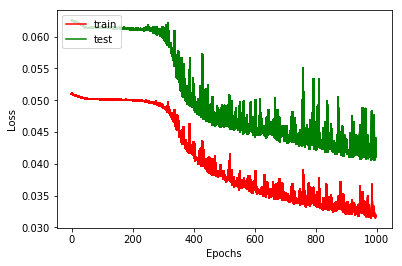

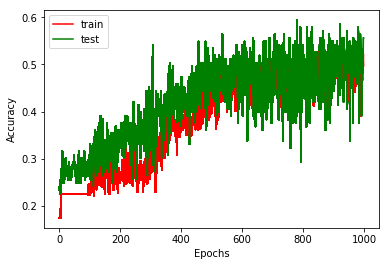

In [11]:
epochs = 1000
bSize = 32 # Batch size
L = 32 # Number of time steps

bCount = len(trainShuffList)//bSize # Number of batches in train set
lastBatch = len(trainShuffList)%bSize # Number of samples in last batch of train set

test_bCount = len(testList)//bSize # Number of batches in test set
test_lastBatch = len(testList)%bSize # Number of samples in last batch of test set

# Lists for saving train/test loss and accuracy
trainLoss = []
trainAcc = []
testLoss = []
testAcc = []

start = time.time()

for epochNum in range(epochs):
    # Shuffling train data for each epoch
    trainList = list(zip(trainShuffList, labelShuffList))
    shuffle(trainList)
    trainShuffList, labelShuffList = zip(*trainList)
    
    trainRunLoss = 0.0
    testRunLoss = 0.0
    trainRunCorr = 0
    testRunCorr = 0
    
    epochStart = time.time()
    
    ## Train
    # Load data tensors batchwise     
    idx = 0    
    for bNum in range(bCount):
        first = True
        # Loading one batch
        for dNum in range(idx,idx+bSize):
            if first:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)
                batchLabel = torch.Tensor([labelShuffList[dNum]]).long()                          
                first = False                
            else:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([labelShuffList[dNum]]).long()),dim=0)            
        
        # Train the network on current batch
        net, tr_loss, tr_corr = train(net, batchData, batchLabel, optimizer, criterion)
        trainRunLoss += tr_loss
        trainRunCorr += tr_corr
        idx += bSize
        
    # Loading last batch
    if lastBatch != 0:        
        first = True
        for dNum in range(idx,idx+lastBatch):
            if first:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)
                batchLabel = torch.Tensor([labelShuffList[dNum]]).long()
                first = False                
            else:
                loadData = torch.load(trainPath+trainShuffList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([labelShuffList[dNum]]).long()),dim=0)          
        
        # Training network on last batch
        net, tr_loss, tr_corr = train(net, batchData, batchLabel, optimizer, criterion)
        trainRunLoss += tr_loss
        trainRunCorr += tr_corr
    
    # Average training loss and accuracy for each epoch
    avgTrainLoss = trainRunLoss/float(len(trainShuffList))
    trainLoss.append(avgTrainLoss)
    avgTrainAcc = float(trainRunCorr)/float(len(trainShuffList))
    trainAcc.append(avgTrainAcc)
    
    ## Test
    # Load data tensors batchwise     
    idx = 0    
    for bNum in range(test_bCount):
        first = True
        # Loading one batch
        for dNum in range(idx,idx+bSize): 
            if first:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)
                batchLabel = torch.Tensor([testLabelList[dNum]]).long()
                first = False                
            else:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([testLabelList[dNum]]).long()),dim=0)            
        
        # Test the network on current batch
        ts_loss, ts_corr = test(net, batchData, batchLabel, criterion)
        testRunLoss += ts_loss
        testRunCorr += ts_corr
        idx += bSize
     
    # Loading last batch    
    if test_lastBatch != 0:        
        first = True
        for dNum in range(idx,idx+test_lastBatch):
            if first:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                batchData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)               
                batchLabel = torch.Tensor([testLabelList[dNum]]).long()
                first = False                
            else:
                loadData = torch.load(testPath+testList[dNum])
                sz = loadData.size(0)
                idx1 = torch.from_numpy(np.arange(0,(sz//L)*L,sz//L))
                tempData = torch.index_select(loadData,dim=0,index=idx1).unsqueeze(0)
                batchData = torch.cat((batchData,tempData), dim=0)
                batchLabel = torch.cat((batchLabel,torch.Tensor([testLabelList[dNum]]).long()),dim=0)          
        
        # Test network on last batch
        ts_loss, ts_corr = test(net, batchData, batchLabel, criterion)
        testRunLoss += ts_loss
        testRunCorr += tr_corr
        
    # Average testing loss and accuracy for each epoch
    avgTestLoss = testRunLoss/float(len(testList))
    testLoss.append(avgTestLoss)
    avgTestAcc = float(testRunCorr)/float(len(testList))
    testAcc.append(avgTestAcc)   

    
    # Plotting training loss vs Epochs
    fig1 = plt.figure(1)        
    plt.plot(range(epochNum+1),trainLoss,'r-',label='train')  
    plt.plot(range(epochNum+1),testLoss,'g-',label='test') 
    if epochNum==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')   
    # Plotting testing accuracy vs Epochs
    fig2 = plt.figure(2)        
    plt.plot(range(epochNum+1),trainAcc,'r-',label='train')    
    plt.plot(range(epochNum+1),testAcc,'g-',label='test')        
    if epochNum==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
    
    epochEnd = time.time()-epochStart
    print('Iteration: {:.0f} /{:.0f};  Training Loss: {:.6f} ; Training Acc: {:.3f}'\
          .format(epochNum + 1,epochs, avgTrainLoss, avgTrainAcc*100))
    print('Iteration: {:.0f} /{:.0f};  Testing Loss: {:.6f} ; Testing Acc: {:.3f}'\
          .format(epochNum + 1,epochs, avgTestLoss, avgTestAcc*100))
    
    print('Time consumed: {:.0f}m {:.0f}s'.format(epochEnd//60,epochEnd%60))
end = time.time()-start
print('Training completed in {:.0f}m {:.0f}s'.format(end//60,end%60))      
            
    
    

In [12]:
torch.save(net.state_dict(), 'LSTM_ucf101_1000adam_1e-4_b32.pt')

In [17]:
print(len(testList) // bSize)

4
